## 05.1 Function
## 甚麼是函式(function)?
### 所謂的函式(function)，是一個建構程式時的小區塊，它就像是一台機器，會執行所有在集區內被設定的程式，函式最重要的工作在於幫你省下輸入重複程式碼的流程，只要定義好函式內容便能夠不斷地重複執行。我們可以使用已經被定義好的函式，例如我們先前所使用的print(),type()都屬於Python內建的函式，當然我們也可以建立自己的函式，自行指定它的功能，以及所需要的原料（指定參數）、產出（輸出結果）。

In [ ]:
print('Hello World')

In [ ]:
type('Hello World')

In [ ]:
round(3.1415926)

3

In [ ]:
max([1,2,3,4,5])

5

### 除了Python內建的這些函式之外，我們也可以過引入模組(Module, 或稱套件)來增加我們可以使用的函式，這些模組又可以從來源上被區分為Python標準函式庫中的模組(standard library)與第三方模組(Third-party modules)。

## Python內建模組

In [ ]:
# sys, os, math都屬於Python標準函式庫中的模組
import sys, os, math

In [ ]:
# sys.exit()可以強制終止Kernel的運行
print('Hello World')
sys.exit()
print('Hi')

Hello World


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
path = os.getcwd()
print(path)

/content


In [ ]:
log = math.log(1024, 2)
print(log)

10.0


## 第三方模組
### 若想引用一些外部模組，則需要透過 $pip install << module_name >> 指令下載完方可使用，例如常見的pandas, seaborn, matplotlib等等，這些常見的套件通常Colab都已經幫你下載好了可以直接使用，但若是在自己電腦上開發就需要特別注意。

In [ ]:
pip install pyperclip

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=ec28900539bd06c4fdf8b4ef931e4555376f206cdb1755496206fb9798761130
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import pyperclip
pyperclip.copy('Hello World')
pyperclip.paste()

'Hello World'

### 而我們在引入這些套件時我們可以自行指定我們呼叫這些套件時的名稱，這在我們引用一些名稱很長的套件的時候很方便，能夠減少我們打字的頻率。例如:

In [ ]:
import pandas as pd
df = pd.DataFrame({
    "Name":['Bob','Alex','Alice'],
    "Salary":[100000,50000,38000]
})
print(df)

    Name  Salary
0    Bob  100000
1   Alex   50000
2  Alice   38000


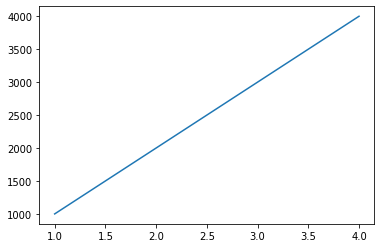

In [ ]:
import matplotlib.pyplot as plt
x = [1,2,3,4]
y = [1000,2000,3000,4000]
plt.plot(x,y)

### 此外，我們也可以單獨引入模組中的某個函式就好，減少儲存空間。

In [ ]:
from pandas import Series
sr = Series([1,2,3])
print(sr)

0    1
1    2
2    3
dtype: int64


## 自寫函式
### 接著我們要來自訂自己的函式，先從一些簡單的例子開始。

In [ ]:
def hello():
  print('Howdy')
  print('Howdy')
  print('Hello there')
hello()

Howdy
Howdy
Hello there


### 我們可以發現一件事，就是在我們撰寫函式的時候，函式集區中的指令並不會被執行，當我們呼叫函式的時候，這些指令才會被執行。同時，我們可以指定想要的參數(parameter)在我們自定義的函式中，例如以下範例中的name。

In [ ]:
def Hi(name):
  print("Hi "+name)
Hi('Alex')

Hi Alex


## Return Statement
### 接著我們要來講一個相當重要的觀念，當我們在呼叫一個函式的後，函式中的所有執行動作執行完畢後會進行值的回傳，若我們沒有用return指令來決定要回傳函式中的那些結果的話，Python會回傳其預設的None值，換言之如果我們沒有用return決定那些值要被回傳的話，所有的函式得到的回傳值都會式None，這點在使用上一定要特別留意。

In [ ]:
def xy():
  x = 5
  y = 10
print(xy())

None


In [ ]:
spam = print('Hello world')

Hello world


In [ ]:
print(spam)
# 輸入spam發現甚麼都沒有

None


In [ ]:
spam == None

True

### 可以看到，函數集區裡面的動作雖然有被執行，但是並沒有值被回傳到函式外面，因此當我們想print()函式的內容時顯示了None，這是Python預設的回傳值。這時我們可以透過return這個指令來決定哪些結果需要被回傳。

In [ ]:
def ab():
  a = 100
  b = 10
  return a,b
a,b = ab()
print(a)
print(b)
print(ab())

100
10
(100, 10)


## 全域(global scope)與區域(local scope)的概念
### 接著我們要來介紹另一個關於函式的重要觀念:全域變數與區域變數。簡單來說，在函式中建立的變數都是區域變數，在函式以外的區域建立的變數就是全域變數。而這兩種變數的使用上會有以下規則。
#### **規則1. 在全域內的程式碼無法使用任何區域內變數**
#### **規則2. 區域內的程式碼可以取用全域變數**
#### **規則3. 單一函式下的區域無法取用來自另一個函式區域下的區域變數**
### 全域變數與區域變數的概念有助於我們釐清我們程式的脈絡，而當程式出問題的時候也能幫助我們快速找到錯誤發生的地方和原因，我們將在接下來的課程針對這些規則逐一示範講解。

## 規則1. 在全域內的程式碼無法使用任何區域內變數

In [ ]:
def spam():
  egg = 99
spam()
print(egg)

NameError: ignored

### 從這個例子中我們看到，由於egg是在spam函式底下的區域被宣告的，因此我們無法在全域中使用他



> ## 規則2. 區域內的程式碼可以取用全域變數



In [ ]:
def spam():
  print(egg)
egg = 42
spam()

42


### 由上面例子我們可以看到，spam這個函式取用了位於全域的egg變數，不僅如此，我們可以額外得知一個重要訊息，就是當我們在函式底下沒有指定區域變數的時候，函式會默認在區域中出現的變數是全域變數。如果我們有指定的話則會如下結果所示:

In [ ]:
def spam():
  egg = 'Hello'
  print(egg)
egg = 42
spam()

Hello


### 除此之外，我們也可以透過global這個指令讓區域變數變成全域變數:

In [ ]:
def spam():
  global egg
  egg = 'Hello'
  print(egg)
egg = 42
spam()
print(egg)

Hello
Hello


## 規則3. 單一函式下的區域無法取用來自另一個函式區域下的區域變數

In [ ]:
def spam():
  egg = 99
  bacon()
  print(egg)

def bacon():
  ham = 101
  eggs = 0
  print('bacon')

spam()

bacon
99


### 從以上範例我們看到，即便我們在spam函式中執行bacon函式，依然無法取用在bacon當中的eggs變數

## 練習
### Q1 以下哪一個是正確的函式編寫語法?
### def function()   b. def function():   c. function()   d. function():

In [5]:
def function():
    print('Hello')

### Q2 以下程式碼的輸出結果為何?
### >>> X = 5
### >>>def plus(X): 
###  &emsp;  &emsp;  &emsp;  return X + 5
### >>>plus(X)
### a. 5   b. 10   c. NameError: name 'X' is not defined

In [7]:
X = 5
def plus(X):
    return X+5
plus(X)

10

### Q3 以下程式碼的輸出結果為何?
### >>>def plus(X):
### &emsp;  &emsp;  &emsp;  Y = 10
### &emsp;  &emsp;  &emsp;  return X+Y
### >>>ptint(Y)
### a. 10   b. NameError: name 'Y' is not defined

In [8]:
def plus(X):
    Y = 10
    return X+Y
print(Y)

NameError: name 'Y' is not defined

### Q4 以下程式碼的輸出結果為何?
### >>> def function():
### &emsp;  &emsp;  &emsp;    global number
###  &emsp;  &emsp;  &emsp;   number = 5
### >>> number = 10
### >>> function()
### >>> print(number)
### a. 5   b. 10   c. NameError: name 'number' is not defined

In [9]:
def function():
    global number 
    number = 5
number = 10
function()
print(number)

5


### Q5 以下程式碼的輸出結果為何?
### >>>def spam():
### &emsp;&emsp;&emsp;		egg = 'Hello'
### &emsp;&emsp;&emsp;		bacon = 'Hi'
###  &emsp;&emsp;&emsp;		return egg
### >>>spam()
### a. 'Hello'   b. 'Hi'   c. None

In [10]:
def spam():
    egg = 'Hello'
    bacon = 'Hi'
    return egg
spam()

'Hello'

## 05.2 Error Handling
### 在開發的過程中，出現錯誤(Error)訊息是常有的事，為了確保程式能夠正常運行，以及在發生錯誤時能夠迅速找出問題並且解決，我們通常會透過try/except指令來幫助我們，我們先來看一個簡單的例子。

In [2]:
def div42by(number):
  return 42/number
print(div42by(2))
print(div42by(3))
print(div42by(0))
print(div42by(12))

21.0
14.0


ZeroDivisionError: ignored

### 當我們執行了上面的程式碼之後我們可以看到錯誤訊息，這是因為我們把42除以0導致的，更重要的是，因為這個錯誤，導致了我們最後的指令print(div42by(12))無法被執行，這時如果我們在函式中加入try/except:

In [3]:
def div42by(number):
  try:
    return 42/number
  except ZeroDivisionError:
    print('Error: You tried to devide by zero.')
print(div42by(2))
print(div42by(3))
print(div42by(0))
print(div42by(12))

21.0
14.0
Error: you tried to devide by zero.
None
3.5


### 可以看到，即便出現錯誤，程式依然會完整執行後面的指令，此外，try/except也很常被應用在一些互動式的程式的開發上，例如以下例子，如果我們輸入文字將會出現問題，因此我們可以用try/except來避免有人輸入中文。

In [8]:
print('你有幾棟房子?')
numCats = input()
try:
  if numCats>=2:
    print('你真是個有錢人')
  else:
    print('我跟你一樣')
except:
  print('你輸入的不是數字，我無法判別')

你有幾棟房子?
六
你輸入的不是數字，我無法判別


### Q1 以下程式碼的輸出結果為何?
### >>>X = 5
### >>>try:
### &emsp; &emsp; 	if X>=3:
### &emsp; &emsp; &emsp;		print('Hi')
### &emsp; &emsp; else:
### &emsp; &emsp; &emsp; 		print('Hello')
### except:
### &emsp; &emsp; print('Please import number!')
### a. 'Hi'   b. 'Hello'   c. 'Please import number!'

In [2]:
X = 5
try:
    if X>=3:
        print('Hi')
    else:
        print('Hello')
except:
    print('Please import number!')

Hi


### Q1 以下程式碼的輸出結果為何?
### >>>X = 'five'
### >>>try:
### &emsp; &emsp; 	if X>=3:
### &emsp; &emsp; &emsp;		print('Hi')
### &emsp; &emsp; else:
### &emsp; &emsp; &emsp; 		print('Hello')
### except:
### &emsp; &emsp; print('Please import number!')
### a. 'Hi'   b. 'Hello'   c. 'Please import number!'

In [3]:
X = 'five'
try:
    if X>=3:
        print('Hi')
    else:
        print('Hello')
except:
    print('Please import number!')

Please import number!


## 05.3 Control point
### 在這個部分，我們將藉由模擬的實際資料，示範Python在資料處理上的相關應用，其中包含幾項稽核的盤查重點如下。

### 1. 初步盤點
### 2. 正確性和完整性
### 3. 有效性
### 4. 法令遵循

## 初步盤點
### 在正式開始稽查之前，先對資料有一個初步的了解是相當重要的，現實中的資料往往伴隨許多的遺失值與錯誤(如上一頁的範例所示)，我們可以利用Python中的一些套件幫助我們快速了解我們手上的資料包含哪些重要資訊。

In [18]:
#快速查看數值變數的各百分位術語最大最小值
import pandas as pd
df = pd.read_csv('mock_data_impaired.csv',encoding = 'big5')
df.describe()

,風險程度,2020~2021自行查核次數
count,101.000000,106.000000
mean,3.257426,15.037736
std,1.814682,4.879353
min,1.000000,8.000000
25%,1.000000,10.000000
50%,4.000000,19.000000
75%,5.000000,19.000000
max,5.000000,20.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   負責部門             106 non-null    object 
 1   業務系統             106 non-null    object 
 2   風險程度             101 non-null    float64
 3   2020~2021自行查核次數  106 non-null    int64  
 4   業務系統最後自行查核日期     100 non-null    object 
 5   業務系統負責人員         96 non-null     object 
 6   業務系統自行查核結果       96 non-null     object 
 7   最後稽核日期           106 non-null    object 
 8   稽核人員             106 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.6+ KB


In [9]:
pip install pandas-profiling 

In [15]:
from  pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
pip install sweetviz

In [17]:
import sweetviz as sv
analysis = sv.analyze(df)
analysis.show_html('mtcars.html')

                                             |                                             | [  0%]   00:00 ->…

C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26280 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31185 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30740 missing from c

C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26989 missing from c

C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\show1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21209 missing from c

Report mtcars.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 進行資料分析時，一定要特別注意遺失值與錯誤資訊，否則將對於分析結果造成重大影響，以下是查找遺失值的常用指令。

In [20]:
df.isna() 

,負責部門,業務系統,風險程度,2020~2021自行查核次數,業務系統最後自行查核日期,業務系統負責人員,業務系統自行查核結果,最後稽核日期,稽核人員
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
101,False,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False


### 可以再透過.sum()指令觀察每一個欄位中的遺失值數量。

In [21]:
df.isna().sum()

負責部門                0
業務系統                0
風險程度                5
2020~2021自行查核次數     0
業務系統最後自行查核日期        6
業務系統負責人員           10
業務系統自行查核結果         10
最後稽核日期              0
稽核人員                0
dtype: int64

### 另外，我們觀察資料可以明顯看到，日期欄位出現人名，這明顯是錯誤訊息，我們可以利用排序功能找出異常值，以下是範例:

In [23]:
df['業務系統最後自行查核日期'].sort_values()   

67     2020/1/12
60     2020/1/13
71     2020/1/26
10     2020/1/28
9     2020/10/15
         ...    
19           NaN
22           NaN
37           NaN
48           NaN
66           NaN
Name: 業務系統最後自行查核日期, Length: 106, dtype: object

In [27]:
df['業務系統最後自行查核日期'].sort_values()[-15:-1]  

51     2021/6/8
63     2021/6/9
86     2021/7/4
81    2021/9/18
43           孔柏
70          曹玲安
97           謝育
34          鐘英銘
2           龔琪凱
18          NaN
19          NaN
22          NaN
37          NaN
48          NaN
Name: 業務系統最後自行查核日期, dtype: object

## 正確性和完整性
### 當我們想盤點一份資料是否包含所有查核項目時，我們可以如以下範例所示進行盤點。

In [31]:
item = ['信用卡系統', 'CRM系統', '信貸系統', '房貸系統', '企業放貸系統', '利率系統', 'OCR系統',
       '推薦系統','電子金融系統','課服系統'] # 需要盤查的所有系統
df['業務系統'].unique() # 顯示資料有紀錄的所有的系統
check_list = list(df['業務系統'].unique())  #將資料轉換成list格式
for i in item:  # 建立for迴圈逐個盤查
    if i not in check_list:
        print(i+'尚未查核')

電子金融系統尚未查核
課服系統尚未查核


## 有效性
### 接著我們希望透過日期來篩選出沒有在2021年以前完成查核的系統，我們結合前述方法查找異常值並找出沒有在2021前完成查核的系統:

In [33]:
systems = df['業務系統'].unique()  #宣告所有要盤查的系統
result_dict = dict([])   #宣告一個字典來儲存盤查結果
for i in systems:
    check_list = df[df['業務系統']==i]['業務系統最後自行查核日期']
    result = []   #用一個列表紀錄每次盤查的年份與錯誤資訊
    for item in check_list:
        try:    #用try/except來過濾錯誤資訊
            result = result + [item.split('/')[0]]  #只取年份作為盤查標準
        except:
            result = result + [item]
    if '2020' not in result:  #若沒有出現在2020年盤查的紀錄則是為不符合有效性
        result_dict[i] = '不符合有效性原則'
    else:
        result_dict[i] = '符合有效性原則'
        
result_dict

{'信用卡系統': '符合有效性原則',
 'CRM系統': '符合有效性原則',
 '信貸系統': '符合有效性原則',
 '房貸系統': '符合有效性原則',
 '企業放貸系統': '符合有效性原則',
 '利率系統': '符合有效性原則',
 'OCR系統': '不符合有效性原則',
 '推薦系統': '符合有效性原則'}

## 法令遵循
### 我們假設，風險指數在4以上的系統，必須達成12次以上的稽查，這時，我們可以透過以下方式，快速找出沒有符合規範的系統與部門。

In [45]:
compliance = df[['負責部門','業務系統','風險程度','2020~2021自行查核次數']]
system = compliance.drop_duplicates(subset = '業務系統').reset_index(drop=True)
result_dict = dict([])
for i in range(0,len(system)):
    if system['風險程度'][i]>=4 and system['2020~2021自行查核次數'][i]<12:
        print(system['負責部門'][i]+system['業務系統'][i]+'未符合相關規範')
    else:
        print(system['負責部門'][i]+system['業務系統'][i]+'符合相關規範')

商業金融處信用卡系統符合相關規範
商業金融處CRM系統符合相關規範
商業金融處信貸系統未符合相關規範
商業金融處房貸系統符合相關規範
企業金融處企業放貸系統未符合相關規範
企業金融處利率系統符合相關規範
數位暨科技研發處OCR系統未符合相關規範
數位暨科技研發處推薦系統符合相關規範


In [44]:
compliance = df[['負責部門','業務系統','風險程度','2020~2021自行查核次數']]
system = compliance.drop_duplicates(subset = '業務系統').reset_index(drop=True)
result_dict = dict([])
for i in range(0,len(system)):
    if system['風險程度'][i]>=4 and system['2020~2021自行查核次數'][i]<12:
        result_dict[system['負責部門'][i]+system['業務系統'][i]] = '未符合相關規範'
    else:
        result_dict[system['負責部門'][i]+system['業務系統'][i]] = '符合相關規範'
result_dict

{'商業金融處信用卡系統': '符合相關規範',
 '商業金融處CRM系統': '符合相關規範',
 '商業金融處信貸系統': '未符合相關規範',
 '商業金融處房貸系統': '符合相關規範',
 '企業金融處企業放貸系統': '未符合相關規範',
 '企業金融處利率系統': '符合相關規範',
 '數位暨科技研發處OCR系統': '未符合相關規範',
 '數位暨科技研發處推薦系統': '符合相關規範'}